In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ladataan tiedostot
df = pd.read_csv('Acceleration_data.csv', delimiter=',')
df = df.rename(columns={
    "seconds_elapsed": "time", 
    "x": "ax", 
    "y": "ay", 
    "z": "az"
})
gps_data = pd.read_csv('GPS_data.csv')
acceleration_data = pd.read_csv('Acceleration_data.csv')
#gps_data = pd.read_csv('GPS_data.csv')


C:\Users\Toni Isopoussu\AppData\Local\Temp\ipykernel_13880\4044322692.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Karttakuva liikkumisesta

import folium

# Ladataan GPS-data
gps_data = pd.read_csv('GPS_data.csv')  # Varmista, että tiedostopolku on oikein

# Oletetaan, että sarakkeet ovat 'latitude' ja 'longitude'
latitude = gps_data['latitude']
longitude = gps_data['longitude']

# Oletetaan, että aloituspiste on ensimmäinen koordinaatti datassa
aloituspiste = [latitude.iloc[0], longitude.iloc[0]]

# Luodaan folium-kartta aloituspisteestä
kartta = folium.Map(location=aloituspiste, zoom_start=15)

# Lisätään reitti kartalle
folium.PolyLine(list(zip(latitude, longitude)), color='red', weight=2.5, opacity=1).add_to(kartta)

# Näytä kartta. Jupyter Notebookissa kartta näkyy suoraan. Muussa tapauksessa tallenna HTML-muodossa ja avaa selaimessa.
kartta.save('liikkumisreitti.html')  # Tallentaa kartan HTML-tiedostona

kartta  # Jos käytät Jupyter Notebookia, tämä näyttää kartan suoraan


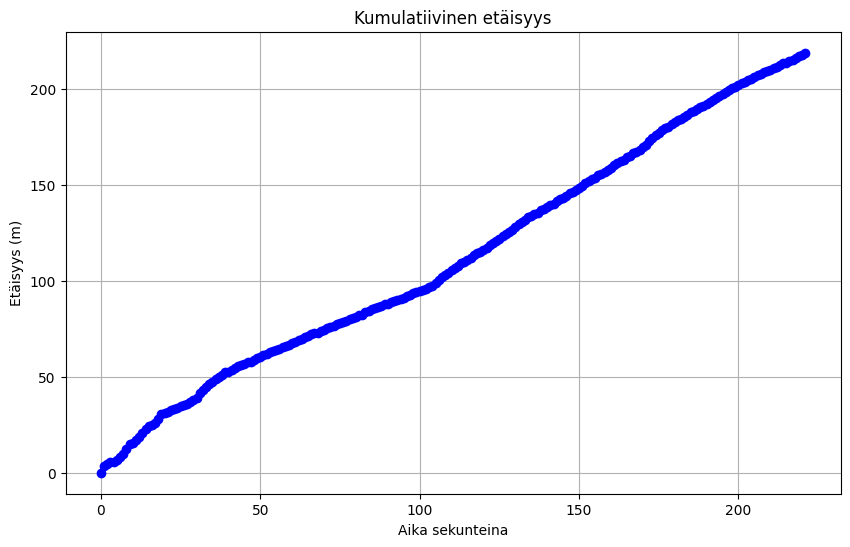

In [27]:
#Etäisyyden kuvaaja (kasvaen nollasta lähtien)

from math import radians, cos, sin, sqrt, atan2

def haversine(lon1, lat1, lon2, lat2):
    """
    Laskee etäisyyden kahden pisteen välillä käyttäen niiden pituus- ja leveysasteita.
    Palauttaa etäisyyden metreinä.
    """
    # Muunna asteet radiaaneiksi
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Haversine-kaava
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    r = 6371000 # Maapallon säde metreinä
    return c * r

# Lasketaan etäisyys jokaisen peräkkäisen pisteen välillä
distances = [haversine(lon1, lat1, lon2, lat2) for lon1, lat1, lon2, lat2 in zip(longitude[:-1], latitude[:-1], longitude[1:], latitude[1:])]

# Lisätään ensimmäinen etäisyys (0), koska reitti alkaa pisteestä 0
distances.insert(0, 0)

# Lasketaan kumulatiivinen etäisyys
cumulative_distance = np.cumsum(distances)

# Piirretään kuvaaja
plt.figure(figsize=(10, 6))
plt.plot(cumulative_distance, marker='o', linestyle='-', color='b')
plt.title('Kumulatiivinen etäisyys')
plt.xlabel('Aika sekunteina')
plt.ylabel('Etäisyys (m)')
plt.grid(True)
plt.show()

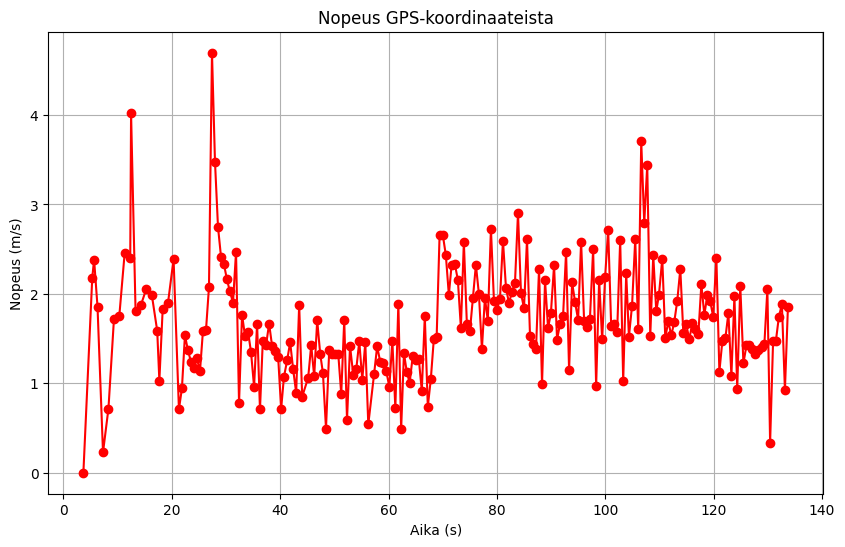

In [28]:
#Nopeuden kuvaaja (laskettuna koordinaateista)

from math import radians, cos, sin, sqrt, atan2

# Lue GPS-data
df = pd.read_csv('GPS_data.csv')

# Määrittele Haversine-funktio
def haversine(lon1, lat1, lon2, lat2):
    """
    Laskee etäisyyden kahden pisteen välillä käyttäen niiden pituus- ja leveysasteita.
    Palauttaa etäisyyden metreinä.
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    r = 6371000  # Maapallon säde metreinä
    return c * r

# Lasketaan etäisyys jokaisen peräkkäisen pisteen välillä
distances = [haversine(lon1, lat1, lon2, lat2) for lon1, lat1, lon2, lat2 in zip(df['longitude'][:-1], df['latitude'][:-1], df['longitude'][1:], df['latitude'][1:])]

# Lisätään ensimmäinen etäisyys (0), koska reitti alkaa pisteestä 0
distances = np.array([0] + distances)

# Lasketaan aikaerot
time_diffs = np.diff(df['seconds_elapsed'].values)  # Oikea tapa laskea aikaerot

# Lasketaan nopeus (m/s) jokaiselle segmentille, paitsi ensimmäiselle
speeds = np.insert(distances[1:] / time_diffs, 0, 0)  # Asetetaan ensimmäinen nopeus nollaksi

# Piirretään nopeuden kuvaaja
plt.figure(figsize=(10, 6))
plt.plot(df['seconds_elapsed'], speeds, marker='o', linestyle='-', color='r')
plt.title('Nopeus GPS-koordinaateista')
plt.xlabel('Aika (s)')
plt.ylabel('Nopeus (m/s)')
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8446 non-null   int64  
 1   time        8446 non-null   float64
 2   az          8446 non-null   float64
 3   ay          8446 non-null   float64
 4   ax          8446 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 330.1 KB


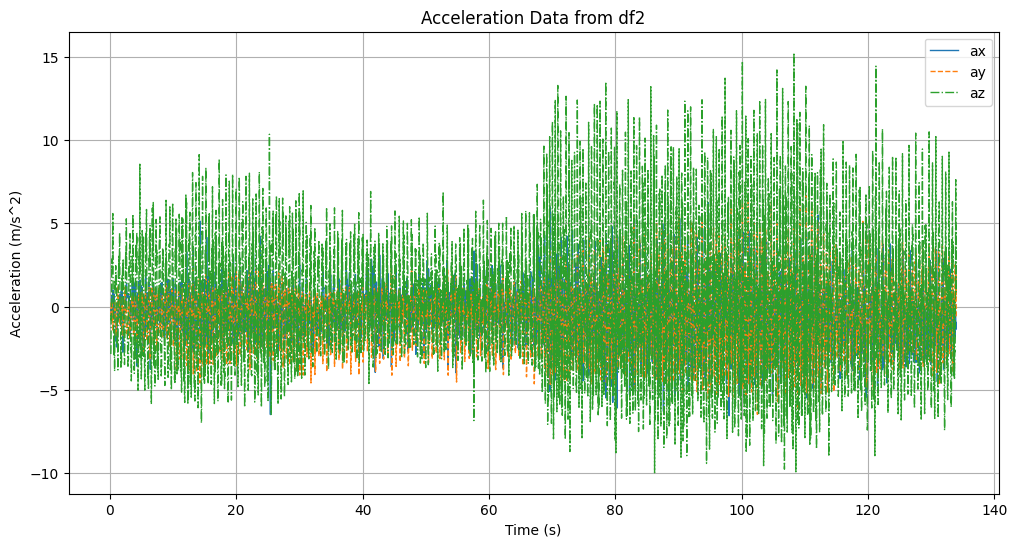

In [29]:
#Kiihtyvyyden kuvaaja kiihtyvyys datasta

# Read the second dataset
df2 = pd.read_csv('Acceleration_data.csv', delimiter=',')
df2 = df2.rename(columns={
    "seconds_elapsed": "time", 
    "x": "ax", 
    "y": "ay", 
    "z": "az"
})

df2.info()
df2.tail()

plt.figure(figsize=(12, 6))

# Plot each acceleration component with a different style
plt.plot(df2.time, df2.ax, '-', label='ax', linewidth=1)
plt.plot(df2.time, df2.ay, '--', label='ay', linewidth=1)
plt.plot(df2.time, df2.az, '-.', label='az', linewidth=1)


# Add grid, legend, and labels
plt.grid(True)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Data from df2')

# Display the plot
plt.show()

In [32]:
#lasketaan Keskinopeus numerona GPS datasta

# Haversine-kaava etäisyyden laskemiseen
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Maapallon säde kilometreinä
    return c * r * 1000  # Palauttaa etäisyyden metreinä

# Lue GPS-data
df = pd.read_csv('GPS_data.csv')

# Käytä 'seconds_elapsed' saraketta aikaleimoina
timestamps = df['seconds_elapsed'].values
latitudes = df['latitude'].values
longitudes = df['longitude'].values

# Laske etäisyydet ja aikavälit
distances = [haversine(latitudes[i], longitudes[i], latitudes[i+1], longitudes[i+1]) for i in range(len(latitudes)-1)]
total_distance = sum(distances)
time_intervals = [timestamps[i+1] - timestamps[i] for i in range(len(timestamps)-1)]
total_time = sum(time_intervals)

# Laske keskinopeus (metriä sekunnissa)
average_speed_m_s = total_distance / total_time

# Jos haluat keskinopeuden kilometreinä tunnissa, muunna se
average_speed_km_h = (average_speed_m_s * 3600) / 1000

print(f'Keskinopeus: {average_speed_km_h:.2f} km/h')

Keskinopeus: 6.06 km/h


In [33]:
#lasketaan Kuljettu matka numerona GPS datasta

def haversine(lat1, lon1, lat2, lon2):
    # Muunna desimaaliasteet radiaaneiksi
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine-kaava
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Maapallon säde kilometreinä
    return c * r * 1000 # Palauta etäisyys metreinä

# Lue GPS-data
df = pd.read_csv('GPS_data.csv')

# Oletetaan, että sarake 'latitude' sisältää leveysasteet ja 'longitude' pituusasteet
lat = df['latitude'].values
lon = df['longitude'].values

# Laske etäisyys jokaisen peräkkäisen pisteen välillä ja summaa ne saadaksesi kokonaismatkan
total_distance = sum(haversine(lat[i], lon[i], lat[i+1], lon[i+1]) for i in range(len(lat)-1))

print(f'Kuljettu matka: {total_distance} m')

Kuljettu matka: 218.7050968954107 m


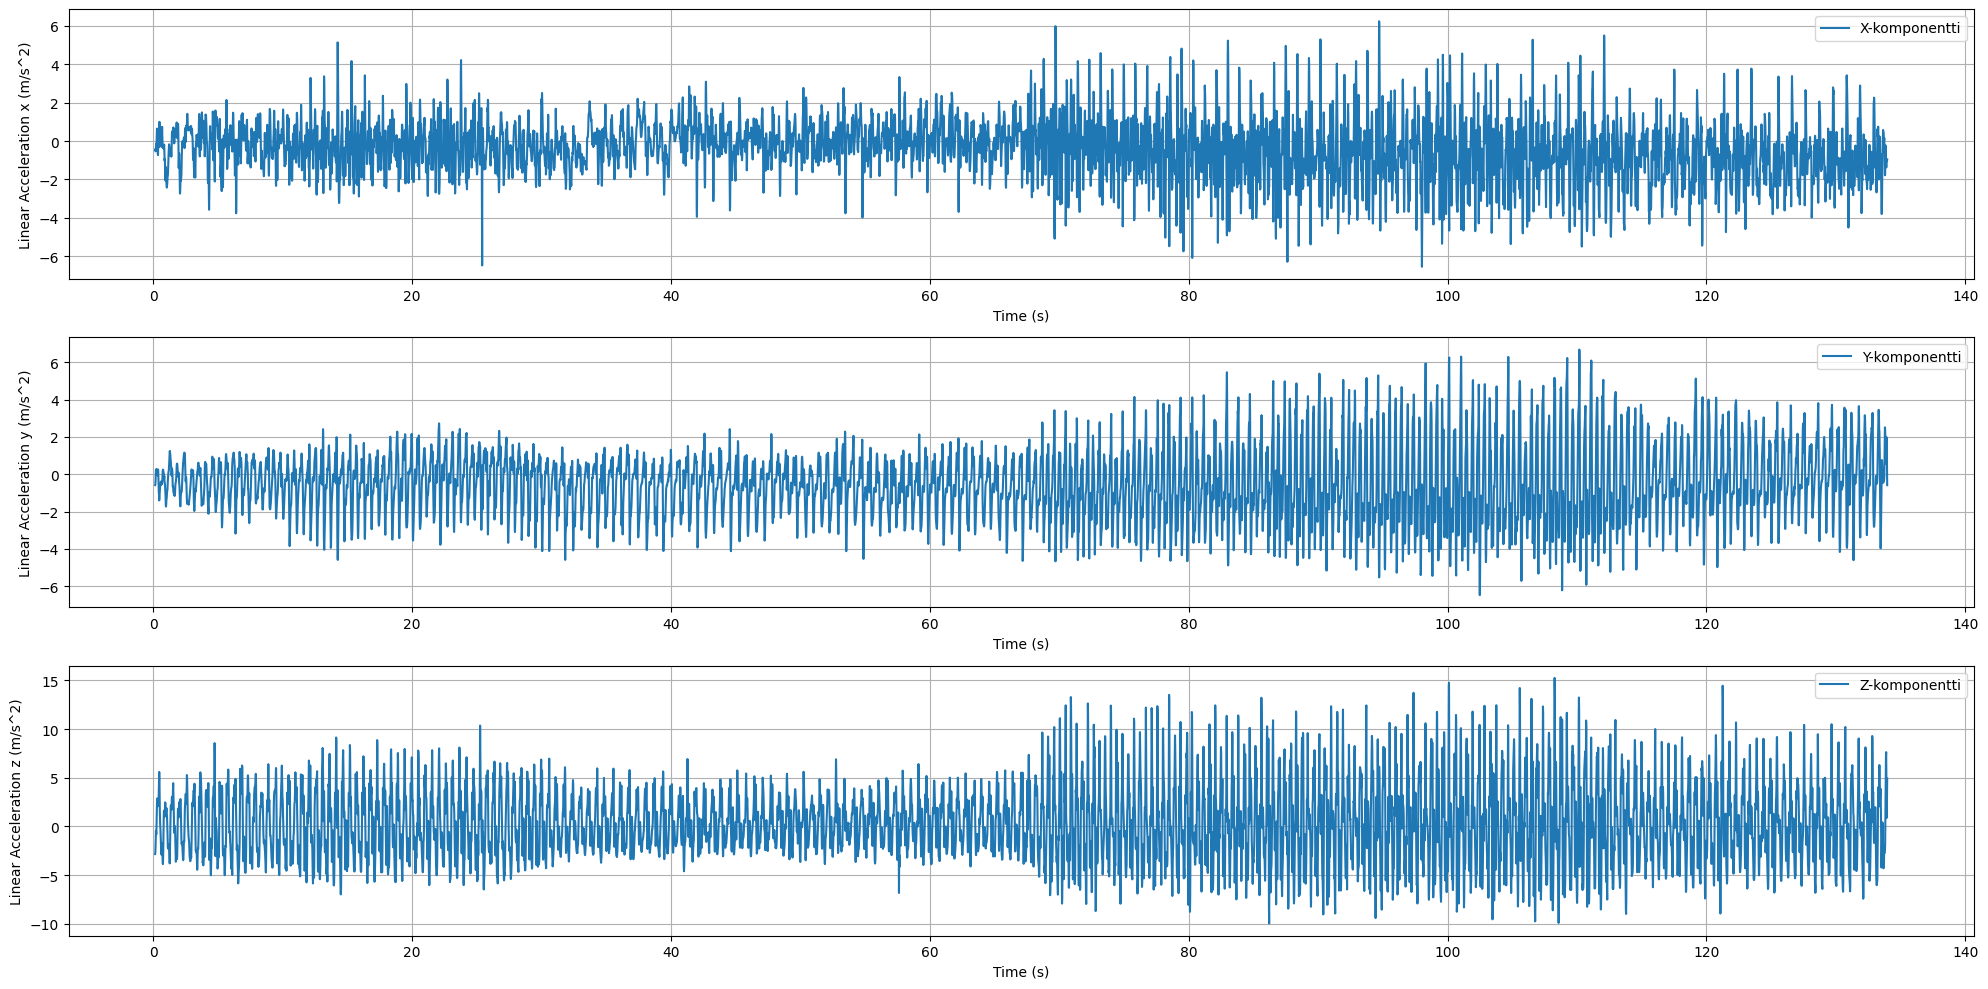

Laskettu askelmäärä: 256


In [42]:
#Askelmäärän laskemista varten suodatun kiihtyvyysdatan kuvaaja (menetelmä 1)

from scipy.signal import butter, filtfilt

# Suodattimen määrittely
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Lataa data
data = pd.read_csv('Acceleration_data.csv', delimiter=',')
data = data.rename(columns={
    "seconds_elapsed": "time", 
    "x": "ax", 
    "y": "ay", 
    "z": "az"
})

# Määritellään suodattimen parametrit
cutoff = 1.5  # Leikkaustaajuus
fs = 50  # Näytteenottotaajuus
order = 4  # Suodattimen järjestys

# Laske kokonaiskiihtyvyys
data['a_tot'] = np.sqrt(data['ax']**2 + data['ay']**2 + data['az']**2)

# Suodata kokonaiskiihtyvyys
filtered_a_tot = butter_lowpass_filter(data['a_tot'], cutoff, fs, order)

# Kuvan määrittely ja visualisointi
plt.figure(figsize=(20, 10), dpi=100)
plt.subplot(3, 1, 1)
plt.plot(data['time'], data['ax'], label='X-komponentti')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration x (m/s^2)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data['time'], data['ay'], label='Y-komponentti')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration y (m/s^2)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data['time'], data['az'], label='Z-komponentti')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration z (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()

# Suodata Z-komponentti
filtered_z = butter_lowpass_filter(data['az'], cutoff, fs, order)

# Oletetaan, että threshold-arvoa ja suodattimen parametreja on säädetty
threshold = 0.01  # Pienennetään kynnysarvoa

# Suoritetaan askelten laskenta uudelleen pienemmällä kynnysarvolla
steps = 0
last_significant_sign = 0  # Alustetaan viimeisin merkittävä muutos

for i in range(1, len(filtered_z)-1):
    if abs(filtered_z[i] - filtered_z[i-1]) > threshold:
        current_sign = np.sign(filtered_z[i] - filtered_z[i-1])
        if current_sign != last_significant_sign:
            steps += 1
            last_significant_sign = current_sign

# Koska jokainen muutos lasketaan nyt askeleena, saatetaan laskea "puoliaskelia",
# joten jakamalla lopputulos kahdella saadaan todellinen askelmäärä.
steps = steps // 2

print(f"Laskettu askelmäärä: {steps}")

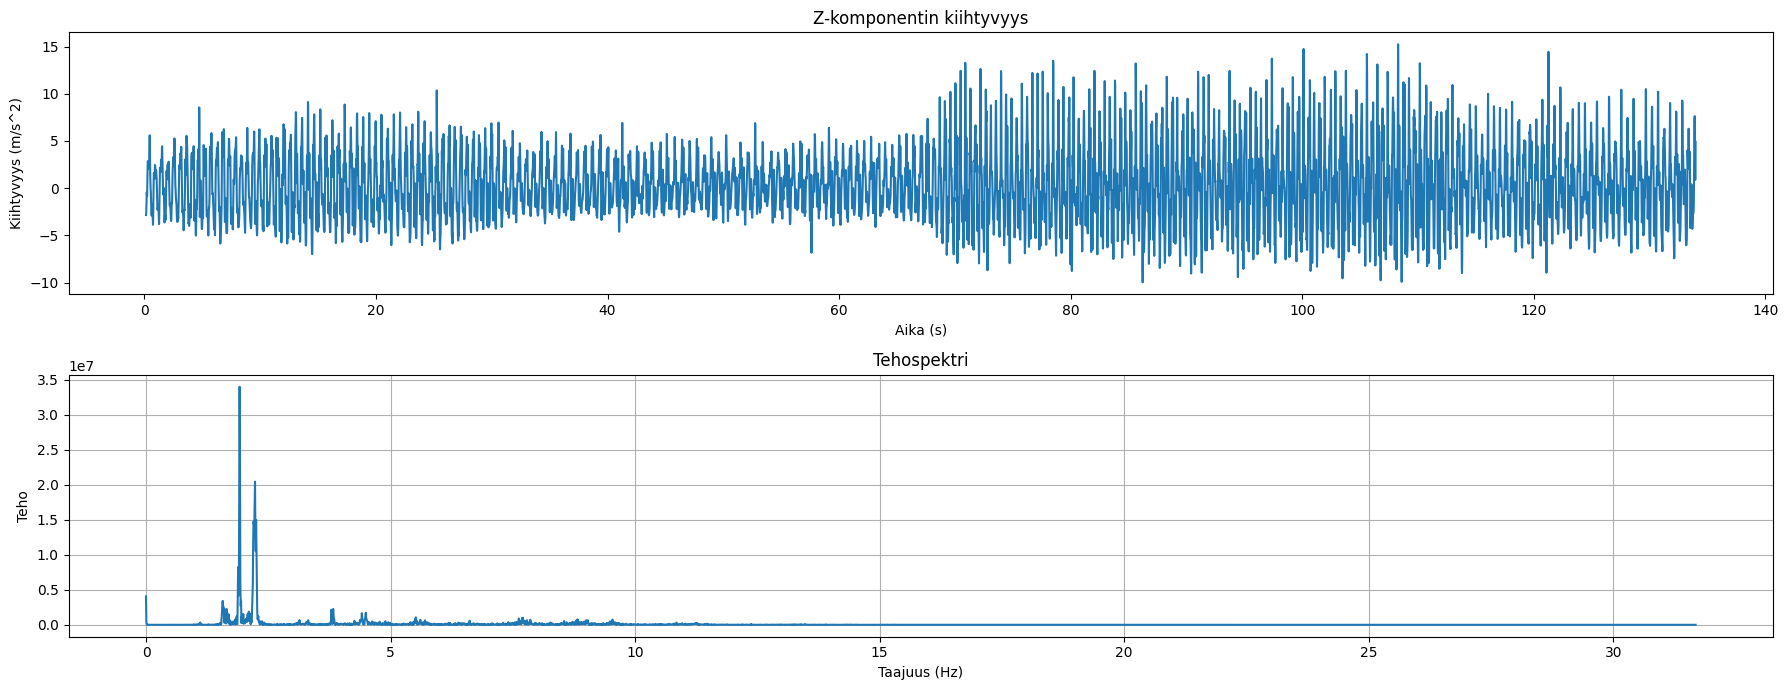

Arvioitu askelmäärä dominantin taajuuden perusteella tehospectrillä: 256


In [40]:
#Askelmäärän laskemiseen tarvittavan tehospektrin kuvaaja (menetelmä 2)

from scipy.fft import fft, fftfreq

# Ladataan data
df = pd.read_csv('Acceleration_data.csv')

# Oikeiden sarakkeiden nimien käyttö
time = df['seconds_elapsed']
az = df['z']
n = len(az)
# Oletetaan tasainen aika-askel kaikkien mittausten välillä
dt = time.iloc[1] - time.iloc[0]
T = time.iloc[-1] - time.iloc[0]

# Tehdään Fourier-muunnos
f = np.fft.fft(az)
freq = np.fft.fftfreq(n, dt)

# Tehospektri
PSD = np.abs(f) ** 2

# Visualisoidaan alkuperäinen signaali ja tehospektri
plt.figure(figsize=(18,7))
plt.subplot(2,1,1)
plt.plot(time, az)
plt.title('Z-komponentin kiihtyvyys')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s^2)')

plt.subplot(2,1,2)
plt.plot(freq[:n // 2], PSD[:n // 2])  # Piirretään vain positiiviset taajuudet
plt.title('Tehospektri')
plt.xlabel('Taajuus (Hz)')
plt.ylabel('Teho')
plt.grid()

plt.tight_layout()
plt.show()

# Etsitään dominantti taajuus
dominant_freq = freq[np.argmax(PSD[:n//2])]

# Lasketaan askeleet olettaen, että dominantti taajuus vastaa kävelyn rytmiä
steps_estimated = dominant_freq * T
print(f'Arvioitu askelmäärä dominantin taajuuden perusteella tehospectrillä: {int(steps_estimated)}')

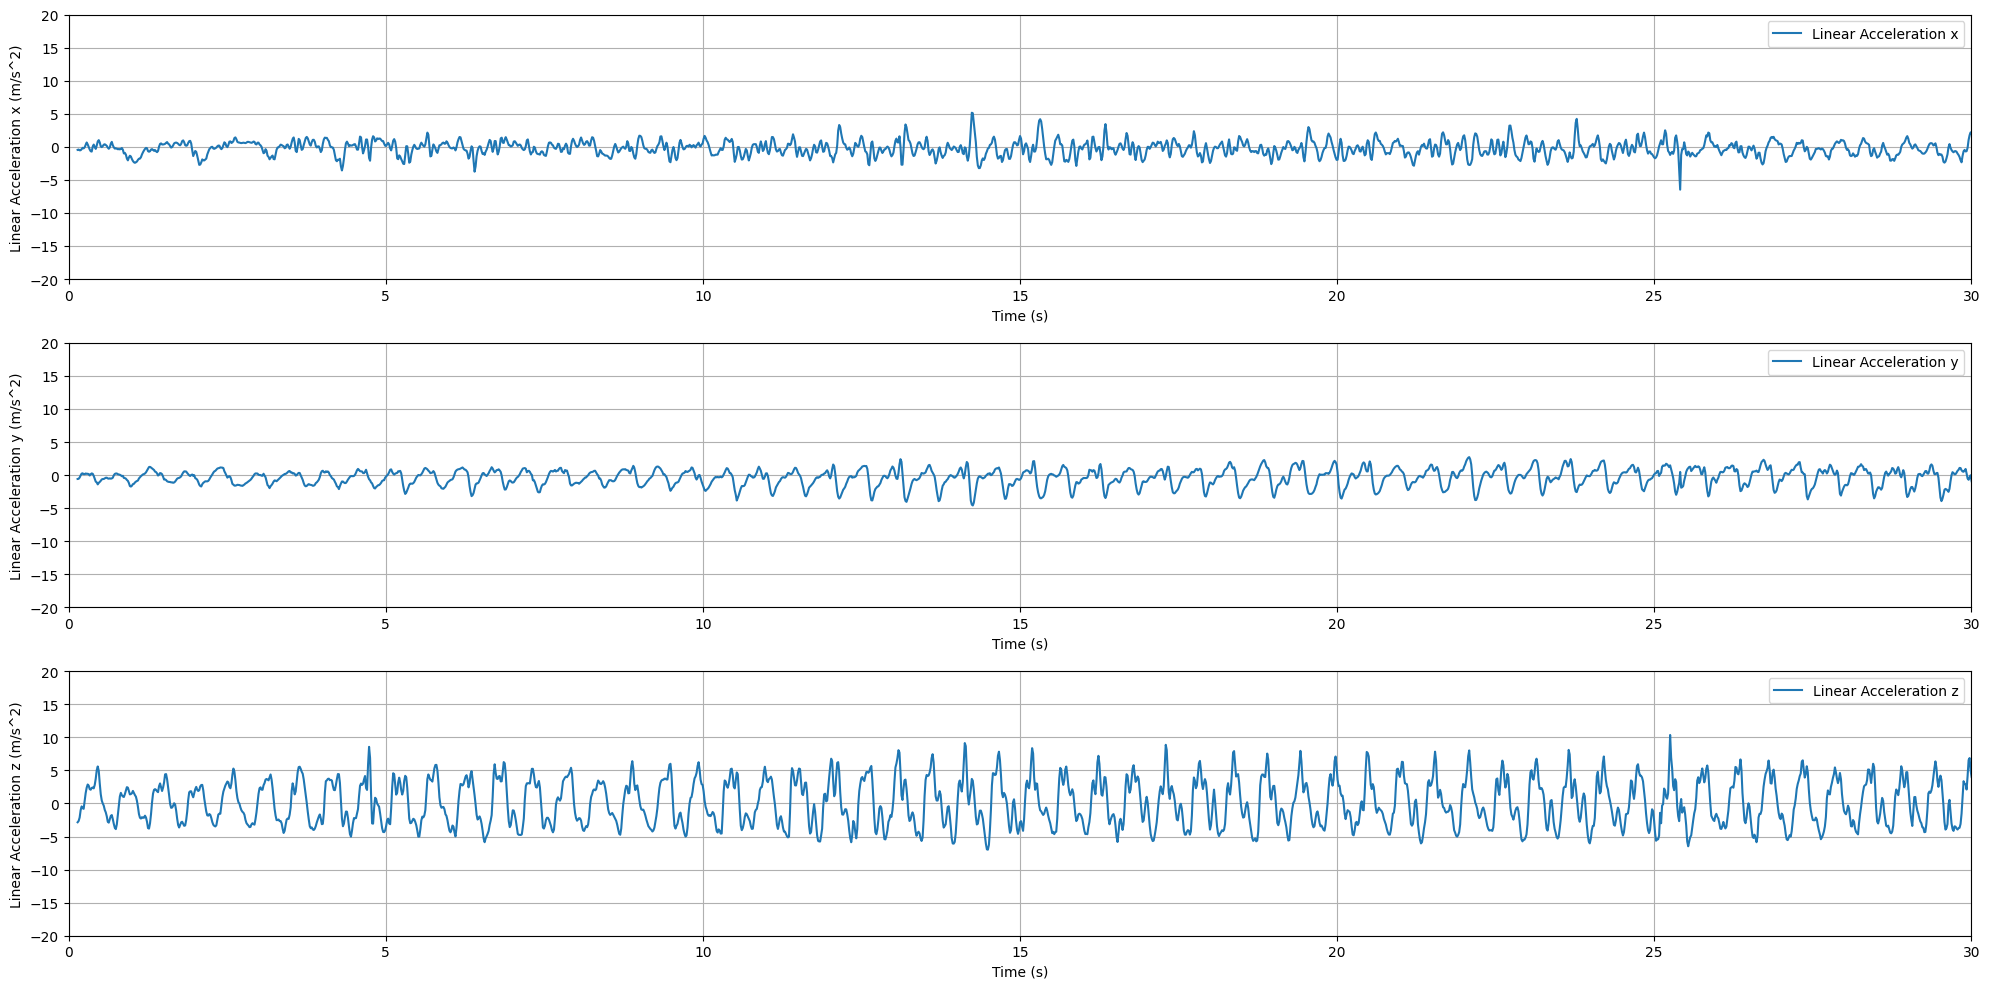

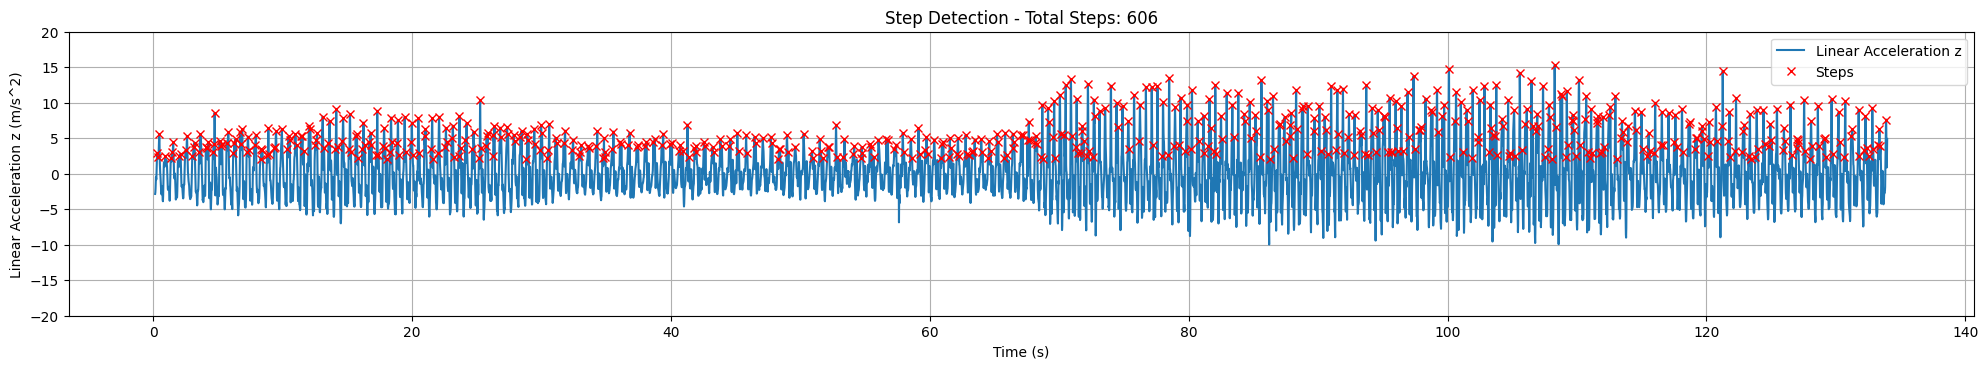

Step Detection with find peaks - Total Steps: 606


In [37]:
#Askelmäärän laskeminen find peaks funktiolla

df2 = pd.read_csv('Acceleration_data.csv', delimiter=',')
df2 = df2.rename(columns={
    "seconds_elapsed": "time", 
    "x": "ax", 
    "y": "ay", 
    "z": "az"
})

fig = plt.figure(figsize=(20, 10), dpi=100)

# X-component plot
plt.subplot(3, 1, 1)
plt.plot(df2['time'], df2['ax'], label='Linear Acceleration x')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration x (m/s^2)')
plt.axis([0, 30, -20, 20])  # Set the x-axis from 0 to 30 seconds and y-axis from -20 to 20 m/s^2
plt.legend()

# Y-component plot
plt.subplot(3, 1, 2)
plt.plot(df2['time'], df2['ay'], label='Linear Acceleration y')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration y (m/s^2)')
plt.axis([0, 30, -20, 20])
plt.legend()

# Z-component plot
plt.subplot(3, 1, 3)
plt.plot(df2['time'], df2['az'], label='Linear Acceleration z')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration z (m/s^2)')
plt.axis([0, 30, -20, 20])
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

from scipy.signal import find_peaks

# Load the data
# df2 = pd.read_csv('your_file.csv')

fig = plt.figure(figsize=(20, 10), dpi=100)

# Z-component plot for step detection
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df2['time'], df2['az'], label='Linear Acceleration z')
ax3.grid(True)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Linear Acceleration z (m/s^2)')
ax3.set_ylim([-20, 20])  # Adjust based on your data

# Detect peaks with a height threshold
peaks, _ = find_peaks(df2['az'], height=2)  # Adjust the height as necessary for your data

# Plot the peaks
ax3.plot(df2['time'][peaks], df2['az'][peaks], 'rx', label='Steps')

# Count the number of steps
number_of_steps = len(peaks)
ax3.legend()
ax3.set_title(f'Step Detection - Total Steps: {number_of_steps}')

# Display the plot
plt.tight_layout()
plt.show()
print(f'Step Detection with find peaks - Total Steps: {number_of_steps}')

   Unnamed: 0  seconds_elapsed         z         y         x
0           0         0.143440 -2.846008 -0.581977 -0.468246
1           1         0.159217 -2.651466 -0.560432 -0.418557
2           2         0.175117 -2.132024 -0.366186 -0.535990
3           3         0.190986 -1.023350 -0.041039 -0.522485
4           4         0.206763 -0.449766  0.229015 -0.356920


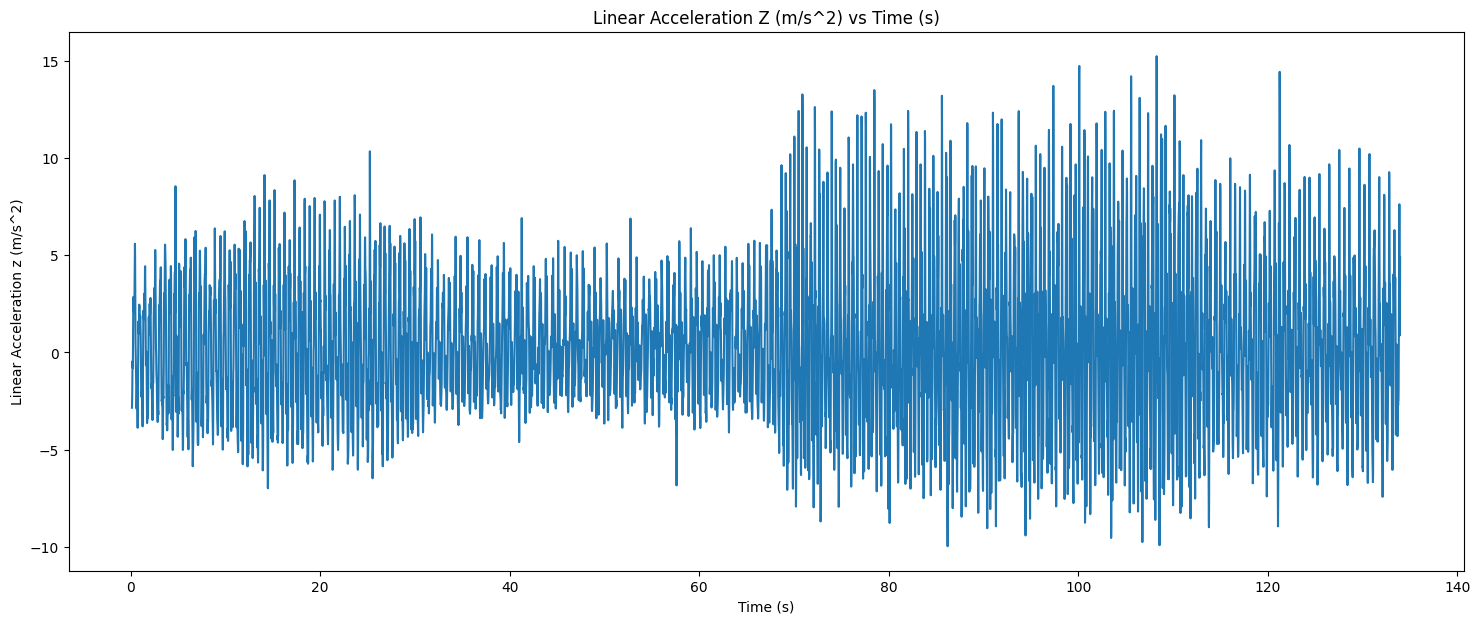

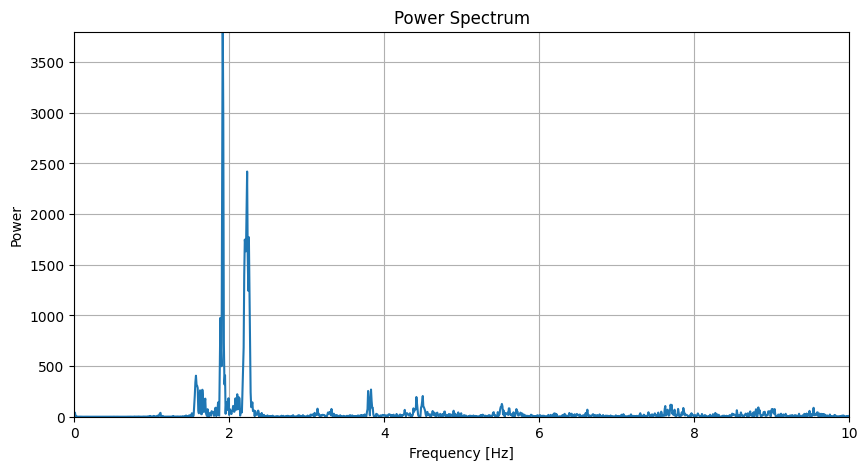

Eniten tehoa sisältävä taajuus on 1.9061134755457043 Hz
Vastaa jaksonaikaa 0.5246277374507876 s
Tehokkaimman taajuuden jaksosen määrä on 255.09080415012346


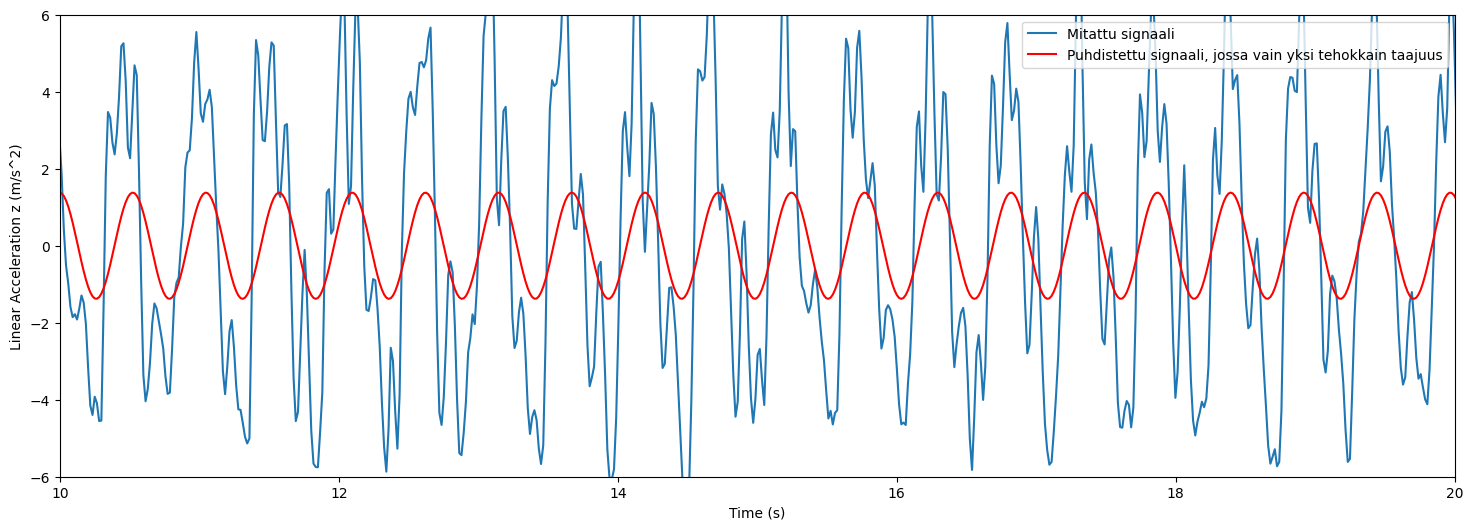

Laskettu askelmäärä: 255


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# Lue kävelydata
df = pd.read_csv('Acceleration_data.csv')

# Tarkista datan alku
print(df.head())

# Piirrä Z-komponentin kävelydata
plt.figure(figsize=(18,7))
plt.plot(df['seconds_elapsed'], df['z'])  # Käytetään 'seconds_elapsed' ajan määrittämiseen ja 'z' Z-komponenttiin
plt.title('Linear Acceleration Z (m/s^2) vs Time (s)')
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration z (m/s^2)')
plt.show()

# Tutkittava signaali
az = df['z']  # Valitaan z-komponentti
t = df['seconds_elapsed']  # Aika
n = len(az)  # Datapisteiden määrä
T = np.max(t) - np.min(t)  # Aikavälin pituus

# Fourier-analyysi
F = np.fft.fft(az)
# Tehospektri (power spectral density)
PSD = F * np.conj(F) / n
freq = np.fft.fftfreq(n, d=(t.iloc[1] - t.iloc[0]))  # Olettaen tasaisesti välein olevat aikapisteet
L = np.arange(1, np.floor(n / 2), dtype='int')

# Piirrä tehospektri
plt.figure(figsize=(10,5))
plt.plot(freq[L], PSD[L].real)  # Käytetään real-osaa, koska PSD on kompleksiluku
plt.title('Power Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.xlim([0, 10])
plt.ylim([0, 3800])
plt.grid()
plt.show()

# Eniten tehoa sisältävä taajuus
max_power_f = freq[np.argmax(PSD[L])]
print(f'Eniten tehoa sisältävä taajuus on {max_power_f} Hz')
print(f'Vastaa jaksonaikaa {1/max_power_f} s')
print(f'Tehokkaimman taajuuden jaksosen määrä on {max_power_f*T}')

# Suodatetaan pois kaikki muut, paitsi tehokkain taajuus
F_denoise = np.zeros_like(F)
F_denoise[np.argmax(PSD)] = F[np.argmax(PSD)]
F_denoise[-np.argmax(PSD)] = F[-np.argmax(PSD)]  # Lisätään myös peilattu arvo säilyttäen symmetrian

# Suodatetaan pois kaikki suuremmat taajuudet (alipäästösuodatin)
# ja kaikki pienemmät taajuudet (ylipäästösuodatin) käyttämällä vastaavia indeksejä

# Puhdistettu signaali
signal_denoise = np.fft.ifft(F_denoise)

plt.figure(figsize=(18,6))
plt.plot(t, az, label='Mitattu signaali')
plt.plot(t, signal_denoise.real, 'r', label='Puhdistettu signaali, jossa vain yksi tehokkain taajuus')  # Käytetään real-osaa
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Linear Acceleration z (m/s^2)')
plt.xlim([10, 20])
plt.ylim([-6, 6])
plt.show()

threshold = np.std(signal_denoise.real) * 0.5
peaks, _ = find_peaks(signal_denoise.real, height=threshold)
steps_count = len(peaks)

print(f'Laskettu askelmäärä: {steps_count}')

In [39]:

import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Lataa data
data = pd.read_csv('Acceleration_data.csv')

# Määritellään tarvittavat sarakkeet
t = data['seconds_elapsed'].values
f = data['z'].values

def calculate_power_spectrum(f, t):
    dt = np.mean(np.diff(t))
    n = len(f)
    fft_vals = fft(f)
    PSD = np.abs(fft_vals) ** 2
    freq = fftfreq(n, dt)
    L = freq > 0  # Valitaan vain positiiviset taajuudet
    
    return freq[L], PSD[L]

psd_freq, psd_values = calculate_power_spectrum(f, t)
max_freq = psd_freq[np.argmax(psd_values)]


# Oletetaan, että kävelyn dominantti taajuus vastaa askelten määrää per aikayksikkö
T = t[-1] - t[0]
steps_estimated = int(max_freq * T)

print('Arvioitu askelmäärä on', steps_estimated)

Arvioitu askelmäärä on 254


Omat mittaukseni ja yleisesti ottaen, nopeudesta laskettu kiihtyvyys ei aina täsmällisesti vastaa havaittua kiihtyvyyttä teknologisten eroavaisuuksien, mittausmenetelmien ja datan käsittelyn oletusten vuoksi. Havaitut erot voivat johtua mittausvirheistä, anturin tarkkuudesta ja numeerisen analyysin menetelmistä.

Askelmäärän suhteen teknologiat ja menetelmät voivat antaa erilaisia tuloksia riippuen niiden herkkyydestä ja suodatusasetuksista. Vaikka usealla eri tavalla lasketut askelmäärät eivät välttämättä ole täsmälleen samat, niiden odotetaan olevan suuruusluokaltaan yhteneväisiä, jos menetelmät ovat luotettavia. Erot askelmäärissä voivat syntyä menetelmien erilaisesta reagoinnista datan muutoksiin.

Käytin useampaa eri menetelmää ja tavat, jotka mittaavat askeleet huippujen perusteella ovat tosi herkkiä kohinalle.